В любой функции разница между f и f2 видна невооруженным глазом более, чем при 99% D.

В легенде графиков процентами указана доля не обнуленных значений D.

Функции `fft` и `ifft` принимают число значений являющееся степенью двойки.

/home/valentiay/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


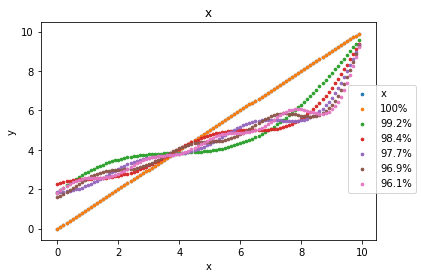

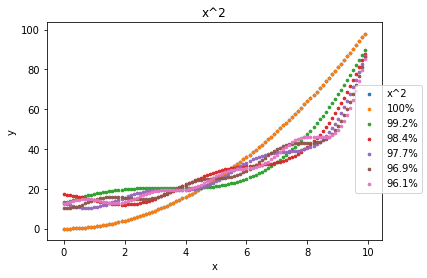

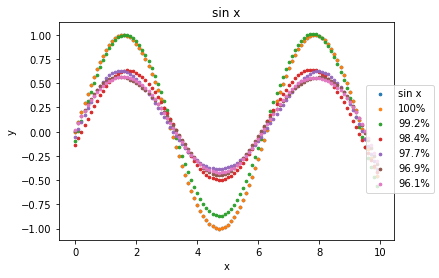

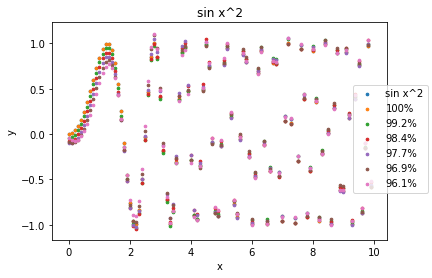

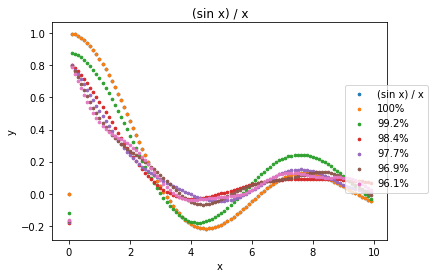

In [264]:
analyzeFFT(lambda x: x, "x")
analyzeFFT(lambda x: x**2, "x^2")
analyzeFFT(sin, "sin x")
analyzeFFT(lambda x: sin(x**2), "sin x^2")
analyzeFFT(lambda x: sin(x) / (x + 1e-10), "(sin x) / x")

In [260]:
import matplotlib.pyplot as plt
from math import *

def analyzeFFT(f, title=""):
    def discretize(f):
        x = [i/10 for i in range(100)]
        y = [f(i/10) for i in range(100)]
        return x, y

    x, y = discretize(f)
    marker_size = 7
    g = fft(y + [0]*28)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    series = (
        plt.scatter(x, y, s = marker_size),
        plt.scatter(x, ifft(g)[:100], s = marker_size),
        plt.scatter(x, ifft(g[:127] + [0])[:100], s = marker_size),
        plt.scatter(x, ifft(g[:126] + [0]*2)[:100], s = marker_size),
        plt.scatter(x, ifft(g[:125] + [0]*3)[:100], s = marker_size),
        plt.scatter(x, ifft(g[:124] + [0]*4)[:100], s = marker_size),
        plt.scatter(x, ifft(g[:123] + [0]*5)[:100], s = marker_size),
    )
    plt.figlegend(series, (title, "100%", "99.2%", "98.4%", "97.7%", "96.9%", "96.1%"), 5)
    plt.show()

In [262]:
def fft (a):
    n = len(a)
    if (n == 1):
        return a[:]

    a0 = fft (a[0::2])
    a1 = fft (a[1::2])
 
    ang = 2 * pi / n
    w = complex(1, 0)  
    wn = complex(cos(ang), sin(ang))
    
    b = [complex(0, 0)] * len(a)
    for i in range(n // 2):
        b[i] = a0[i] + w * a1[i]
        b[i + n // 2] = a0[i] - w * a1[i]
        w = w * wn;
    
    return b

In [263]:
def ifft (a):
    n = len(a)
    if (n == 1):
        return a[:]

    a0 = ifft (a[0::2])
    a1 = ifft (a[1::2])
 
    ang = -2 * pi / n
    w = complex(1, 0)  
    wn = complex(cos(ang), sin(ang))
    
    b = [complex(0, 0)] * len(a)
    for i in range(n // 2):
        b[i] = a0[i] + w * a1[i];
        b[i + n // 2] = a0[i] - w * a1[i];
        b[i] = b[i] / 2
        b[i + n // 2] = b[i + n // 2] / 2;
        w = w * wn;
    
    return b